# Cleaning

We load the csv file and view the first rows

In [2]:
import pandas as pd

# Cargar el CSV en un DataFrame
df_2019 = pd.read_csv('../data/raw/2019.csv')  

# Configurar pandas para mostrar más filas y columnas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Mostrar las primeras filas para exploración inicial
df_2019.head(5)


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


We remove the columns that we do not need for our future analysis.

In [3]:
# Eliminar columnas innecesarias (suponiendo que algunas no son útiles para el análisis)
columns_to_drop = ['Social support']

df_2019 = df_2019.drop(columns=columns_to_drop)

# Verificar las primeras filas después de eliminar las columnas
print("Después de eliminar columnas innecesarias:")
# Configurar pandas para mostrar más filas y columnas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

df_2019.head(5)

Después de eliminar columnas innecesarias:


,Overall rank,Country or region,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,0.999,0.557,0.322,0.298


Here we have to normalize some columns so that later when doing the merge it is much easier.

In [4]:
# Normalización de nombres de columnas
df_2019.rename(columns={
    'Overall rank': 'Happiness_Rank',
    'Country or region': 'Country',
    'Score': 'Happiness_Score',
    'GDP per capita': 'GDP_per_Capita',
    'Healthy life expectancy': 'Healthy_life_expectancy',
    'Freedom to make life choices': 'Freedom',
    'Generosity': 'Generosity',
    'Perceptions of corruption': 'Perceptions_of_corruption'
}, inplace=True)

# Mostrar las primeras filas después de renombrar las columnas
print("\nPrimeras filas después de renombrar columnas:")
# Configurar pandas para mostrar más filas y columnas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Mostrar las primeras filas para exploración inicial
df_2019.head(5)


Primeras filas después de renombrar columnas:


,Happiness_Rank,Country,Happiness_Score,GDP_per_Capita,Healthy_life_expectancy,Freedom,Generosity,Perceptions_of_corruption
0,1,Finland,7.769,1.340,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,0.999,0.557,0.322,0.298


We check that there are no nulls

In [5]:
# Revisar la cantidad de valores nulos por columna
print("\nValores nulos por columna:")
print(df_2019.isnull().sum())


Valores nulos por columna:
Happiness_Rank               0
Country                      0
Happiness_Score              0
GDP_per_Capita               0
Healthy_life_expectancy      0
Freedom                      0
Generosity                   0
Perceptions_of_corruption    0
dtype: int64


We check for duplicate rows

In [6]:
# Verificar si hay filas duplicadas
duplicados = df_2019.duplicated().sum()
print(f"Filas duplicadas: {duplicados}")

# Si hay duplicados, imprimir las primeras filas duplicadas
if duplicados > 0:
    print("\nPrimeras filas duplicadas:")
    print(df_2019[df_2019.duplicated()].head())

Filas duplicadas: 0


We save the clean file in a csv in the data folder for later use.

In [7]:
df_2019.to_csv('../data/clean/2019_clean.csv', index=False)
print("archivo guardado exitosamente.")

archivo guardado exitosamente.


# Analysis

Analysis 1: Distribution of 'GDP_per_Capita' with a histogram.
We will examine the distribution of GDP per capita for countries in 2019.

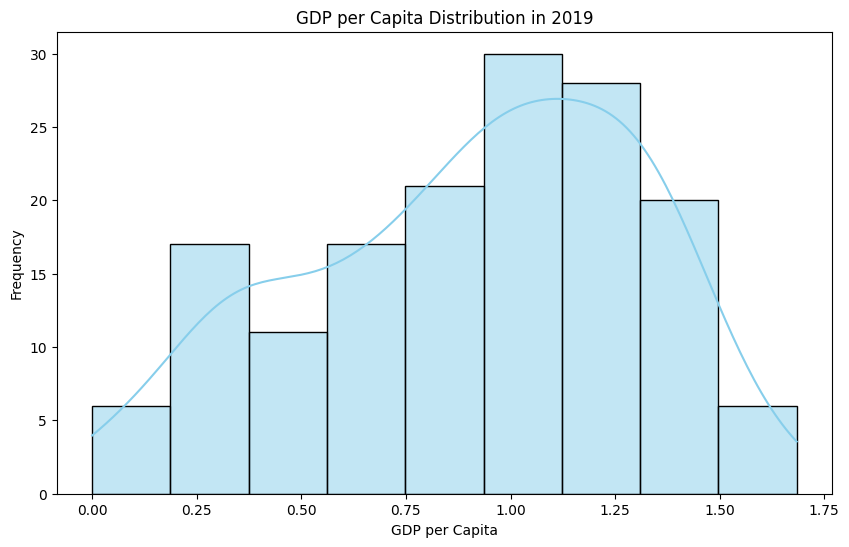

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the 2019 dataset
df_2019 = pd.read_csv('../data/clean/2019_clean.csv')

# Display the first rows to inspect the data
df_2019.head()


plt.figure(figsize=(10, 6))
sns.histplot(df_2019['GDP_per_Capita'], kde=True, color='skyblue')
plt.title('GDP per Capita Distribution in 2019')
plt.xlabel('GDP per Capita')
plt.ylabel('Frequency')
plt.show()



Analysis 2: Correlation Heatmap between 'GDP_per_Capita', 'Healthy_life_expectancy', and 'Happiness_Score'
This heatmap shows the correlation between GDP per capita, healthy life expectancy, and happiness score in 2019.

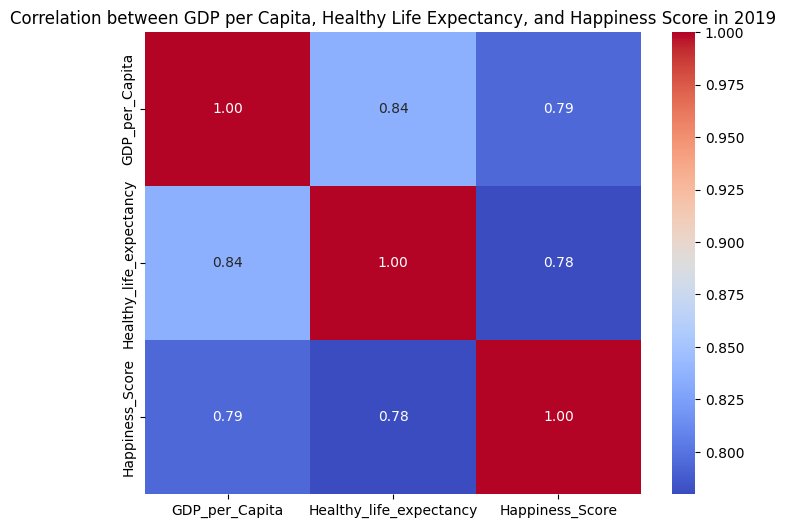

In [2]:
plt.figure(figsize=(8, 6))
correlation_matrix = df_2019[['GDP_per_Capita', 'Healthy_life_expectancy', 'Happiness_Score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between GDP per Capita, Healthy Life Expectancy, and Happiness Score in 2019')
plt.show()

Analysis 3: Scatter plot of 'GDP_per_Capita' vs 'Happiness_Score'
This scatter plot explores the relationship between GDP per capita and happiness score in 2019.

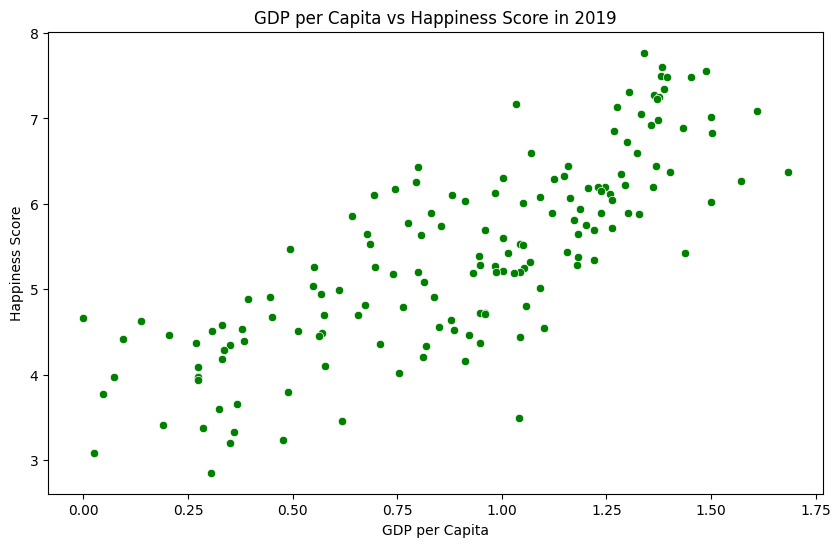

In [3]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP_per_Capita', y='Happiness_Score', data=df_2019, color='green')
plt.title('GDP per Capita vs Happiness Score in 2019')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()
